# Global Data on Sustainable Energy (2000-2020)

https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy/data

This comprehensive dataset showcasing sustainable energy indicators and other useful factors across all countries from 2000 to 2020. 


## Questions

1. Access to Electricity of Population(%) (By Country with Map Slider)

2. Renewable Energy  percentage(%) of total final energy consumption (By Country with Map Slider)

3. Top 10 Countries electricity supply from fossil, nuclear and renewable energy

4. Top 10 Countries electricity supply from renewable energy

5. Top 10 Countries with most CO2 Emissions

6. Compare Electricity production from fossil and renewable sources (By Year)

7. CO2 Emission and Per Person Health Expense(USD)

8. How Forest is decreasing from the year 2000 to 2020

#### Include libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go

import wbgapi as wb
import warnings


import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

### Read Data from csv file and through API

In [2]:
df = pd.read_csv('global-data-on-sustainable-energy.csv')
display(df.head())
display(df.shape)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


(3649, 21)

#### Current health expenditure per capita and Forest area (% of land area) from World Bank through API

In [3]:
health = wb.data.DataFrame(['SH.XPD.CHEX.PC.CD'], time = range(2000,2021),labels=True)
health = pd.DataFrame(health).reset_index()
health.head()

,economy,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
0,ZWE,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.249458,87.494652,89.260956,100.136932,114.444298,105.098030,106.189697,92.254311,114.633598,54.808506,50.676510
1,ZMB,Zambia,26.036491,26.323874,27.114857,32.51955,39.201366,49.429550,62.614231,49.344803,55.919750,50.960819,54.645390,56.895809,67.981705,86.344048,66.047142,57.990551,55.984695,65.821213,74.597534,67.457771,53.753658
2,YEM,"Yemen, Rep.",24.136793,25.455067,26.282944,33.58860,36.898983,40.907562,48.032043,55.675426,66.465805,62.604012,64.443275,61.270248,70.128960,74.300758,75.416016,63.300209,NaN,NaN,NaN,NaN,NaN
3,PSE,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
forest = wb.data.DataFrame(['AG.LND.FRST.ZS'], time = range(2000,2021),labels=True)
forest = pd.DataFrame(forest).reset_index()
forest.head()

,economy,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
0,ZWE,Zimbabwe,47.475714,47.356624,47.237534,47.118444,46.999354,46.880264,46.761174,46.642083,46.522993,46.403903,46.284813,46.165723,46.046633,45.927543,45.808453,45.689363,45.570273,45.451183,45.332093,45.213002,45.093912
1,ZMB,Zambia,63.296520,63.248362,63.200204,63.152047,63.103889,63.055731,63.007573,62.959416,62.911258,62.863100,62.814942,62.561805,62.308667,62.055529,61.802392,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337
2,YEM,"Yemen, Rep.",1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832
3,PSE,West Bank and Gaza,1.508306,1.522757,1.537209,1.551661,1.566113,1.580565,1.595017,1.609468,1.623920,1.638372,1.652824,1.659136,1.665449,1.671761,1.678073,1.684385,1.684385,1.684385,1.684385,1.684385,1.684385
4,VIR,Virgin Islands (U.S.),58.485714,57.902857,57.320000,56.737143,56.154286,55.571429,54.988571,54.405714,53.822857,53.240000,52.657143,53.074286,53.491429,53.908571,54.325714,54.742857,55.171429,55.600000,56.028571,56.457143,56.885714


## Cleaning
#### columns rename process

In [5]:
dic = {
  " ": "_",
  "%": "",
  "#": "",
  "(": "",
  ")": "",
  "$": "",
  "/": "_",
  "\n": "",
  "-": "_",
  "__": "_",
}

In [6]:
def format_columns(df_clr, dic):
    """
    Cleans up numbers, URLs, and special characters from a string.

    Args:
        df : dataframe
        dic: dictionary
    Return:
        clean columns
    """
    # Remove special characters
    
    df_clr = df_clr.rename(columns=str.lower)
    
    for x, y in dic.items():
        df_clr.columns = df_clr.columns.str.replace(x,y)
    
    df_clr.columns = df_clr.columns.str.strip("_")
    
    return df_clr.columns

In [7]:
df.columns = format_columns(df,dic)
df.columns

Index(['entity', 'year', 'access_to_electricity_of_population',
       'access_to_clean_fuels_for_cooking',
       'renewable_electricity_generating_capacity_per_capita',
       'financial_flows_to_developing_countries_us',
       'renewable_energy_share_in_the_total_final_energy_consumption',
       'electricity_from_fossil_fuels_twh', 'electricity_from_nuclear_twh',
       'electricity_from_renewables_twh', 'low_carbon_electricity_electricity',
       'primary_energy_consumption_per_capita_kwh_person',
       'energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp',
       'value_co2_emissions_kt_by_country',
       'renewables_equivalent_primary_energy', 'gdp_growth', 'gdp_per_capita',
       'density\np_km2', 'land_areakm2', 'latitude', 'longitude'],
      dtype='object')

In [8]:
health.columns
health = health.rename(columns=str.lower)
health.columns = health.columns.str.replace('yr','')
health.head(3)

,economy,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ZWE,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.249458,87.494652,89.260956,100.136932,114.444298,105.098030,106.189697,92.254311,114.633598,54.808506,50.676510
1,ZMB,Zambia,26.036491,26.323874,27.114857,32.51955,39.201366,49.429550,62.614231,49.344803,55.919750,50.960819,54.645390,56.895809,67.981705,86.344048,66.047142,57.990551,55.984695,65.821213,74.597534,67.457771,53.753658
2,YEM,"Yemen, Rep.",24.136793,25.455067,26.282944,33.58860,36.898983,40.907562,48.032043,55.675426,66.465805,62.604012,64.443275,61.270248,70.128960,74.300758,75.416016,63.300209,NaN,NaN,NaN,NaN,NaN


In [9]:
forest.columns
forest = forest.rename(columns=str.lower)
forest.columns = forest.columns.str.replace('yr','')
forest.head(3)

,economy,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ZWE,Zimbabwe,47.475714,47.356624,47.237534,47.118444,46.999354,46.880264,46.761174,46.642083,46.522993,46.403903,46.284813,46.165723,46.046633,45.927543,45.808453,45.689363,45.570273,45.451183,45.332093,45.213002,45.093912
1,ZMB,Zambia,63.296520,63.248362,63.200204,63.152047,63.103889,63.055731,63.007573,62.959416,62.911258,62.863100,62.814942,62.561805,62.308667,62.055529,61.802392,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337
2,YEM,"Yemen, Rep.",1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832


#### Add new column , health_expenditure_per_capita , to the base dataframe

In [10]:
country = df.entity.unique()

In [11]:
'''
paremeters
new_data pandas dataframe
return list
'''

def create_data_from_api_data(new_data):
    val = []
    for cnt in country:
        expend = new_data[new_data['country'] == cnt].iloc[0:,2:]
        year = df[df['entity'] == cnt]['year']
        for yr in year:
            col_yr_str = str(yr)
            if  col_yr_str in expend.columns:
                v = expend[col_yr_str].values
                if v:
                    val.append(round(v[0],2))
                else:
                    val.append(0)
    return val

#### Merge new columns to the main dataframe df

In [12]:
df['health_expenditure_per_capita'] = create_data_from_api_data(health)

In [13]:
df['forest_area'] = create_data_from_api_data(forest)

#### save merged data in a csv file

In [14]:
df.to_csv('merged-datasustainable-energy.csv',index=False)

#### read data from merged file

In [15]:
data = pd.read_csv('merged-datasustainable-energy.csv')
display(data.head(5))
display(data.shape)

,entity,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries_us,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,low_carbon_electricity_electricity,primary_energy_consumption_per_capita_kwh_person,energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp,value_co2_emissions_kt_by_country,renewables_equivalent_primary_energy,gdp_growth,gdp_per_capita,density\np_km2,land_areakm2,latitude,longitude,health_expenditure_per_capita,forest_area
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,NaN,1.85
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,NaN,1.85
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953,17.01,1.85
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953,17.81,1.85
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953,21.43,1.85


(3649, 23)

#### Checking null values

In [16]:
data.isnull().sum()

entity                                                             0
year                                                               0
access_to_electricity_of_population                               10
access_to_clean_fuels_for_cooking                                169
renewable_electricity_generating_capacity_per_capita             931
financial_flows_to_developing_countries_us                      2089
renewable_energy_share_in_the_total_final_energy_consumption     194
electricity_from_fossil_fuels_twh                                 21
electricity_from_nuclear_twh                                     126
electricity_from_renewables_twh                                   21
low_carbon_electricity_electricity                                42
primary_energy_consumption_per_capita_kwh_person                   0
energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp         207
value_co2_emissions_kt_by_country                                428
renewables_equivalent_primary_ener

#### Percentage of Null values

In [17]:
cols_with_null = data.columns[data.isnull().sum() > 0]
cols_nan_percentage = pd.DataFrame(round((100 * data[cols_with_null].isnull().sum()/len(data.index)),2)).reset_index()
cols_nan_percentage.columns = ['col_name','percentage']
cols_nan_percentage

,col_name,percentage
0,access_to_electricity_of_population,0.27
1,access_to_clean_fuels_for_cooking,4.63
2,renewable_electricity_generating_capacity_per_...,25.51
3,financial_flows_to_developing_countries_us,57.25
4,renewable_energy_share_in_the_total_final_ener...,5.32
5,electricity_from_fossil_fuels_twh,0.58
6,electricity_from_nuclear_twh,3.45
7,electricity_from_renewables_twh,0.58
8,low_carbon_electricity_electricity,1.15
9,energy_intensity_level_of_primary_energy_mj_20...,5.67


#### drop columns that have over 25% missing values

In [18]:
cols_nan_percentage_ov_50 = cols_nan_percentage[cols_nan_percentage['percentage'] > 50].reset_index()
drop_list = list(cols_nan_percentage_ov_50['col_name'])
drop_list.extend(['latitude','longitude'])
data = data.drop(drop_list, axis=1)
data.head(3)

,entity,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,low_carbon_electricity_electricity,primary_energy_consumption_per_capita_kwh_person,energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp,value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\np_km2,land_areakm2,health_expenditure_per_capita,forest_area
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60,652230.0,NaN,1.85
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60,652230.0,NaN,1.85
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60,652230.0,17.01,1.85


#### Check duplicate rows

In [19]:
dups = data.duplicated()
dups.sum()

0

#### Split into categorical and numerical

In [20]:
numerical = data.select_dtypes(np.number)
numerical.head(5)

,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,low_carbon_electricity_electricity,primary_energy_consumption_per_capita_kwh_person,energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp,value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,land_areakm2,health_expenditure_per_capita,forest_area
0,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,652230.0,NaN,1.85
1,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,652230.0,NaN,1.85
2,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,652230.0,17.01,1.85
3,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,652230.0,17.81,1.85
4,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,652230.0,21.43,1.85


In [21]:
categorical = data.select_dtypes(include='object')
categorical.head(5)

,entity,density\np_km2
0,Afghanistan,60
1,Afghanistan,60
2,Afghanistan,60
3,Afghanistan,60
4,Afghanistan,60


## Wrangling Data

In [22]:
numerical.nunique()

year                                                              21
access_to_electricity_of_population                             2040
access_to_clean_fuels_for_cooking                                896
renewable_electricity_generating_capacity_per_capita            2110
renewable_energy_share_in_the_total_final_energy_consumption    2587
electricity_from_fossil_fuels_twh                               1859
electricity_from_nuclear_twh                                     547
electricity_from_renewables_twh                                 1533
low_carbon_electricity_electricity                              2647
primary_energy_consumption_per_capita_kwh_person                3628
energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp        1044
value_co2_emissions_kt_by_country                               2397
gdp_growth                                                      3320
gdp_per_capita                                                  3367
land_areakm2                      

In [23]:
categorical.nunique()

entity            176
density\np_km2    124
dtype: int64

## EDA

In [24]:
numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,3649.0,2010.038367,6.054228e+00,2000.000000,2005.000000,2010.000000,2015.000000,2.020000e+03
access_to_electricity_of_population,3639.0,78.933702,3.027554e+01,1.252269,59.800890,98.361570,100.000000,1.000000e+02
access_to_clean_fuels_for_cooking,3480.0,63.255287,3.904366e+01,0.000000,23.175000,83.150000,100.000000,1.000000e+02
renewable_electricity_generating_capacity_per_capita,2718.0,113.137498,2.441673e+02,0.000000,3.540000,32.910000,112.210000,3.060190e+03
renewable_energy_share_in_the_total_final_energy_consumption,3455.0,32.638165,2.989490e+01,0.000000,6.515000,23.300000,55.245000,9.604000e+01
electricity_from_fossil_fuels_twh,3628.0,70.365003,3.480519e+02,0.000000,0.290000,2.970000,26.837500,5.184130e+03
electricity_from_nuclear_twh,3523.0,13.450190,7.300662e+01,0.000000,0.000000,0.000000,0.000000,8.094100e+02
electricity_from_renewables_twh,3628.0,23.968010,1.044311e+02,0.000000,0.040000,1.470000,9.600000,2.184940e+03
low_carbon_electricity_electricity,3607.0,36.801182,3.431488e+01,0.000000,2.877847,27.865068,64.403792,1.000000e+02
primary_energy_consumption_per_capita_kwh_person,3649.0,25743.981745,3.477322e+04,0.000000,3116.737300,13120.570000,33892.780000,2.625857e+05


#### Correlation of Numerical data

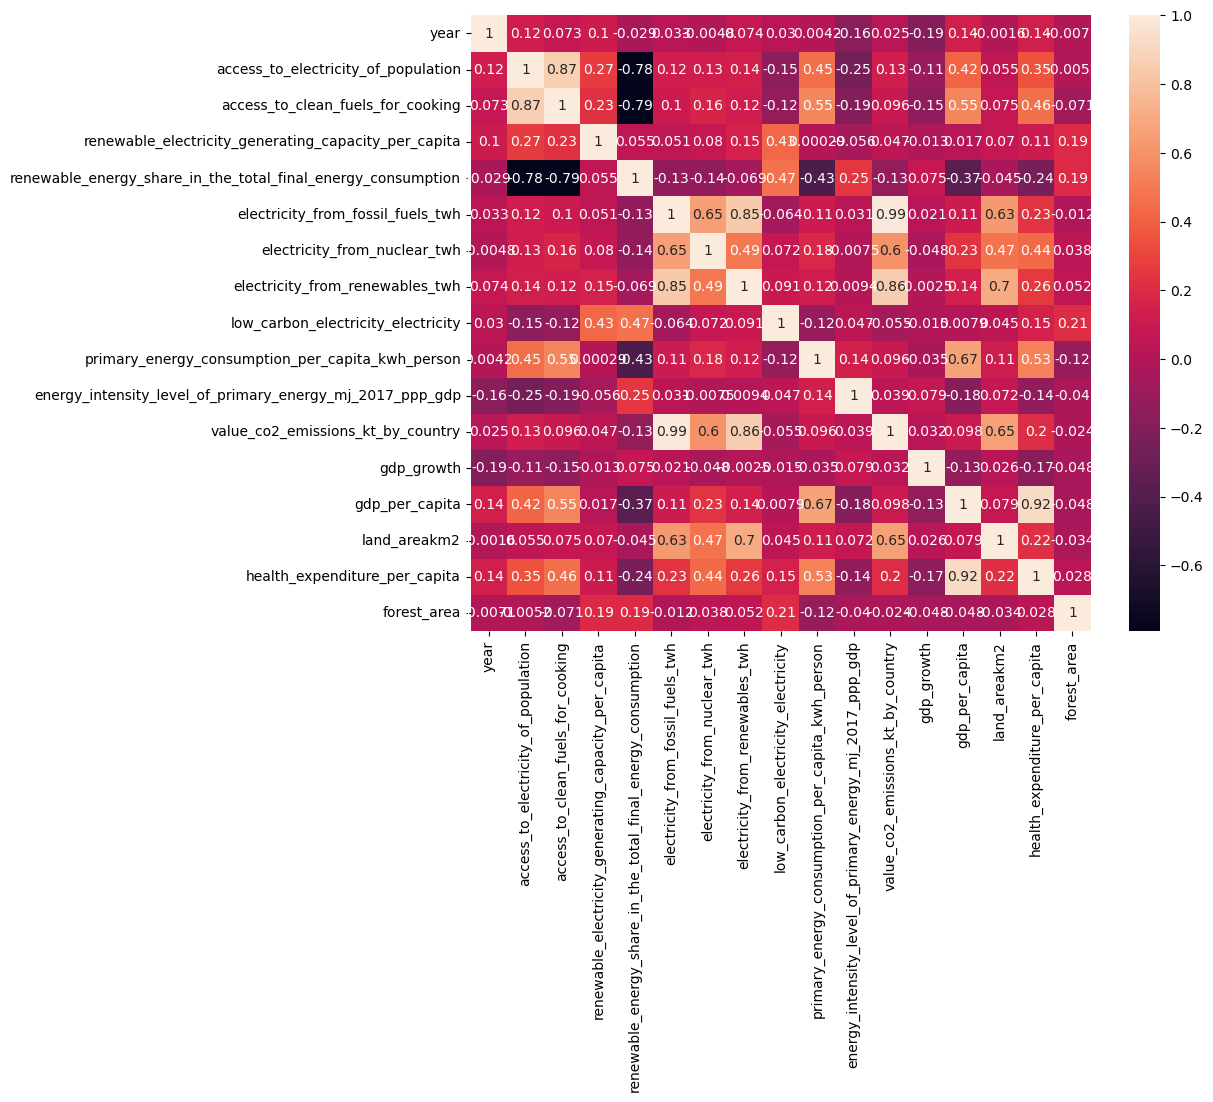

In [25]:
correlations = numerical.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations, annot=True)
plt.show()

In [26]:
numerical.isnull().sum()

year                                                              0
access_to_electricity_of_population                              10
access_to_clean_fuels_for_cooking                               169
renewable_electricity_generating_capacity_per_capita            931
renewable_energy_share_in_the_total_final_energy_consumption    194
electricity_from_fossil_fuels_twh                                21
electricity_from_nuclear_twh                                    126
electricity_from_renewables_twh                                  21
low_carbon_electricity_electricity                               42
primary_energy_consumption_per_capita_kwh_person                  0
energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp        207
value_co2_emissions_kt_by_country                               428
gdp_growth                                                      317
gdp_per_capita                                                  282
land_areakm2                                    

#### Plots for variable types

In [27]:
def plot_graph(df, dtype='descrete'):
    
    match dtype:
        case "continues":
            for col in df:
                sns.histplot(data=df, x=col, kde=True)
                plt.show()
        case "boxplot":
            for col in df:
                sns.boxplot(y=df[col])
                plt.show()
        case _:
            for col in df:
                sns.countplot(x=col, data=df)
                plt.show()

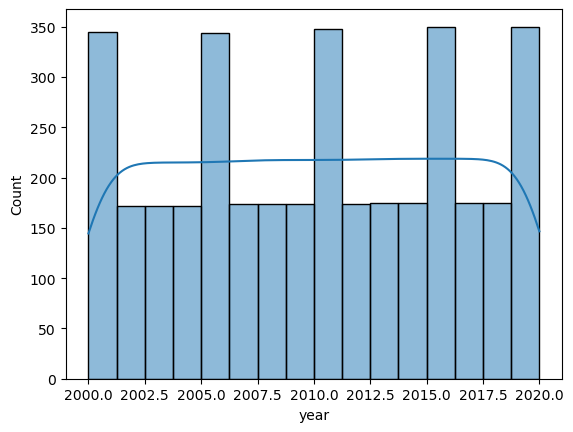

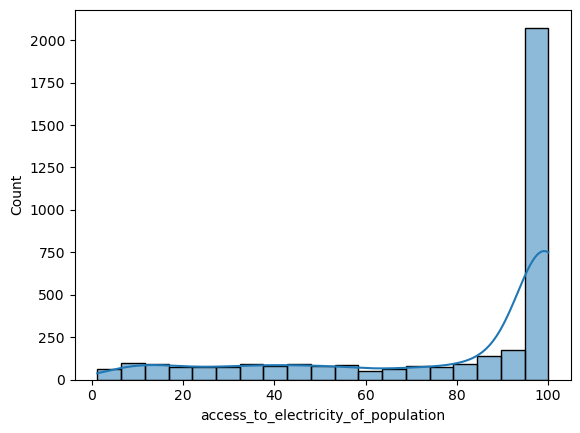

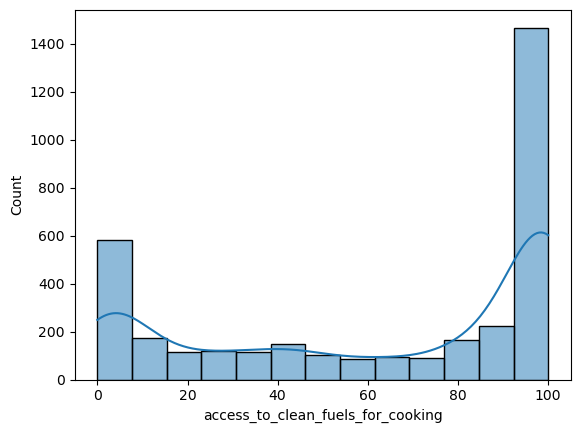

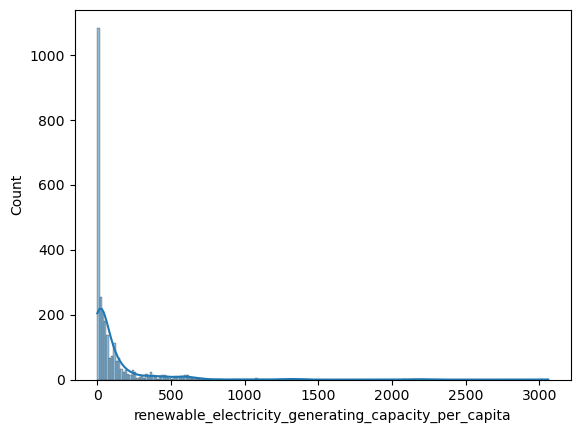

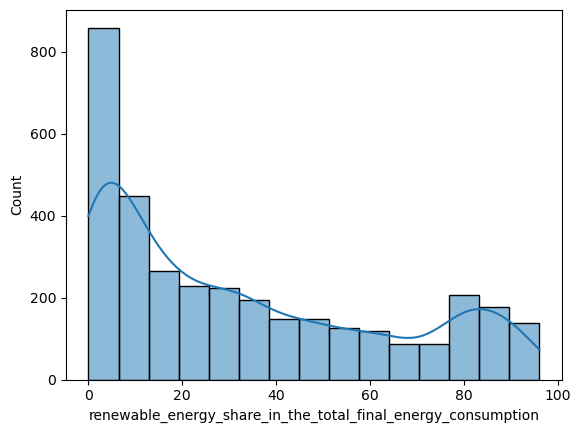

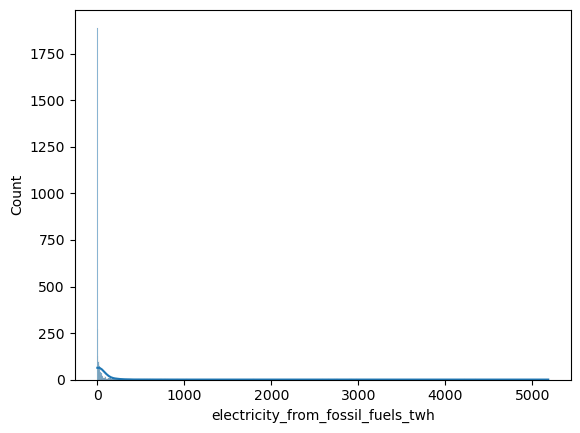

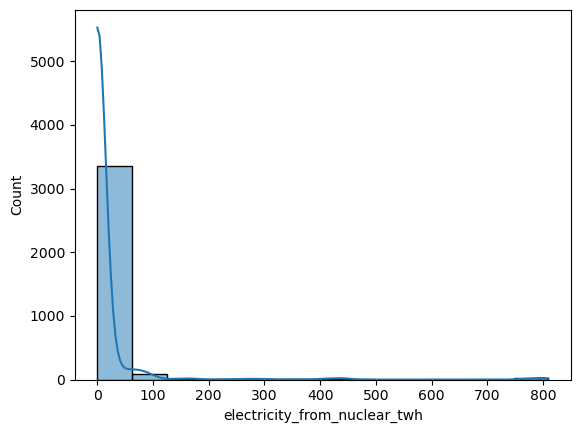

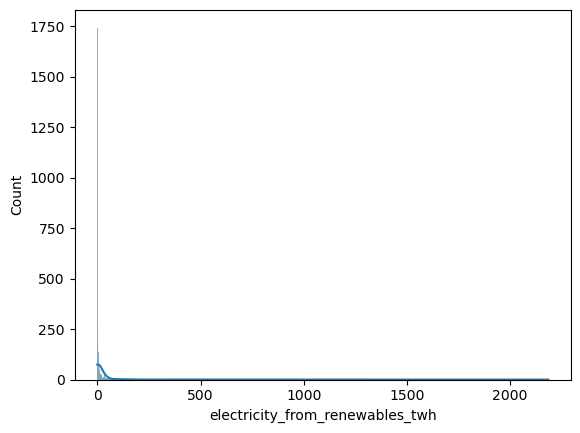

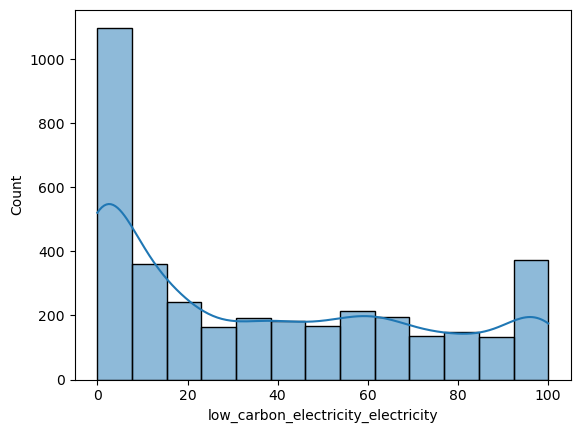

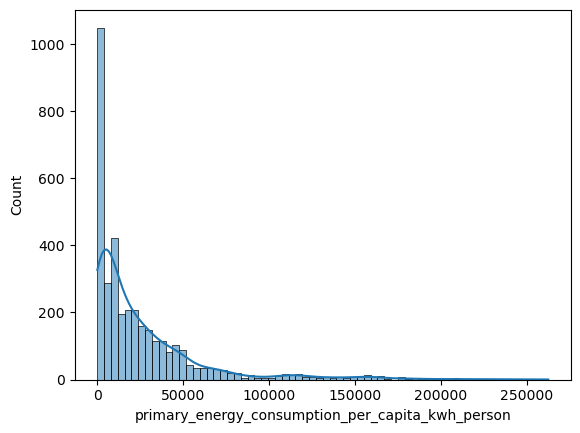

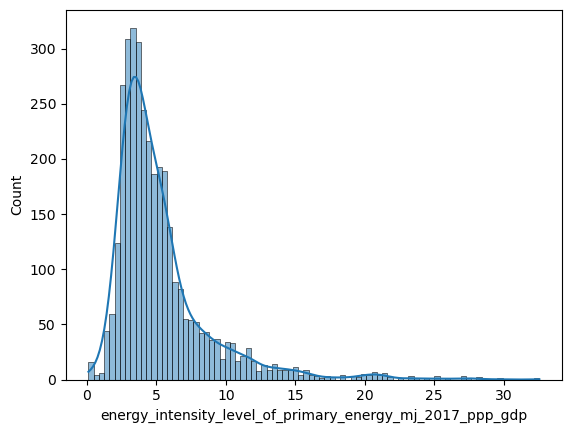

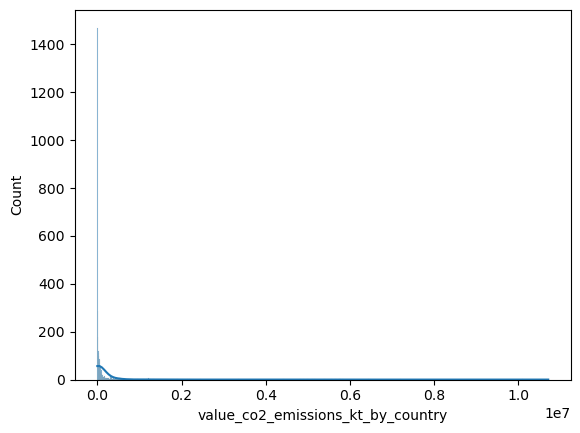

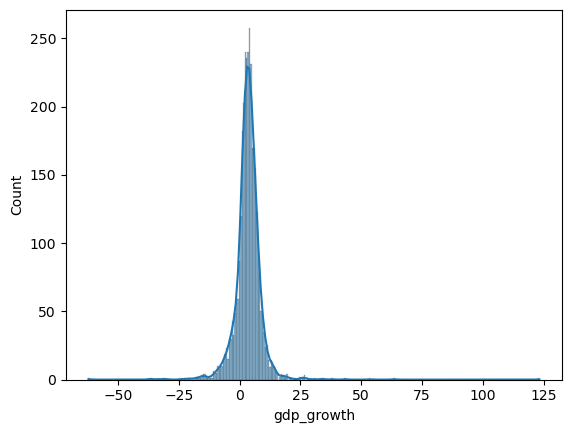

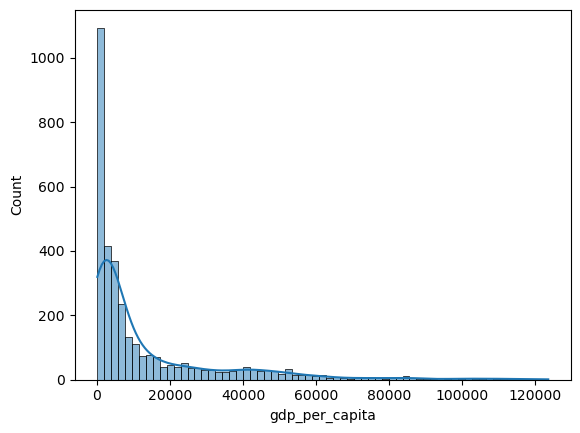

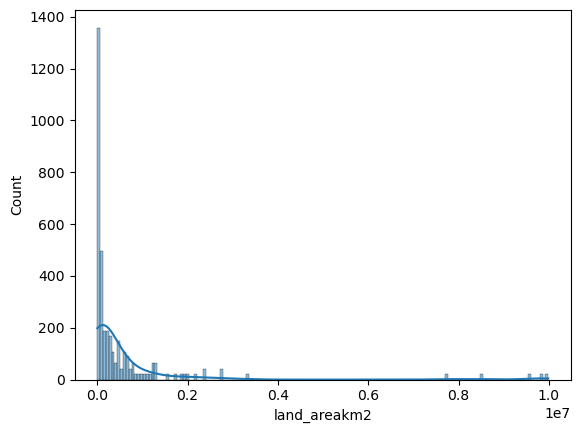

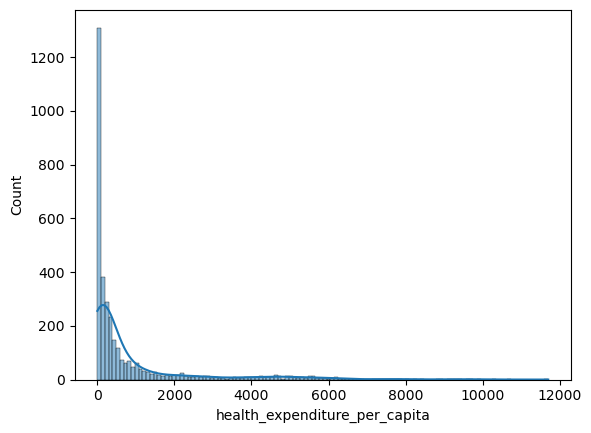

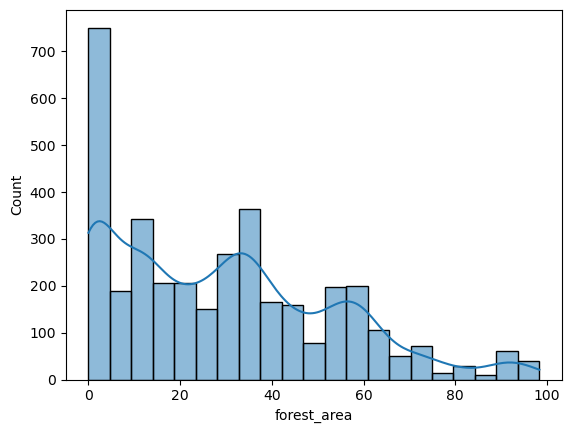

In [28]:
plot_graph(numerical,'continues')

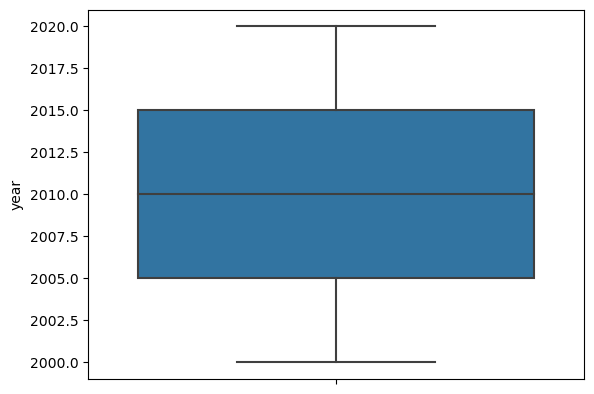

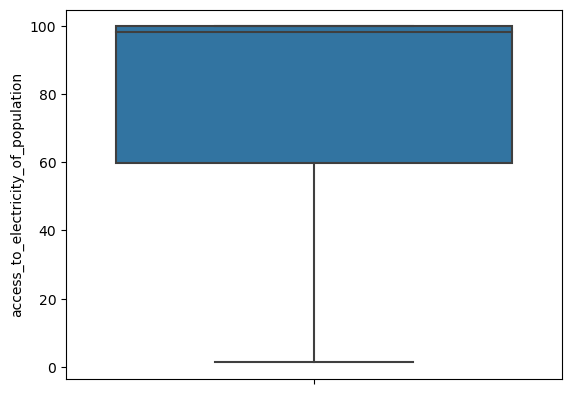

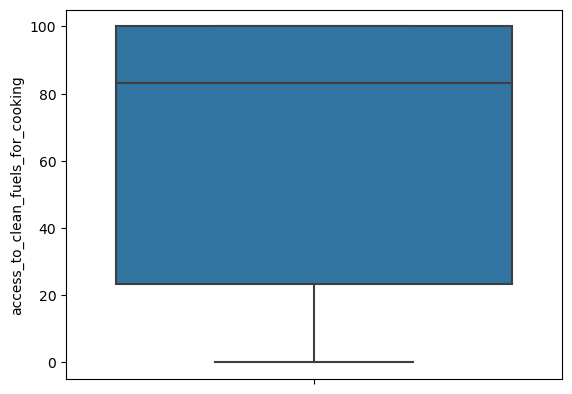

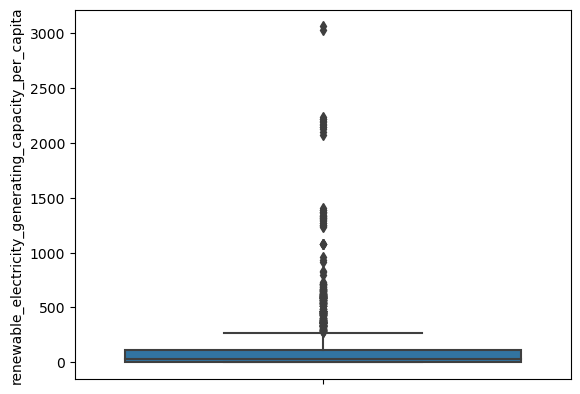

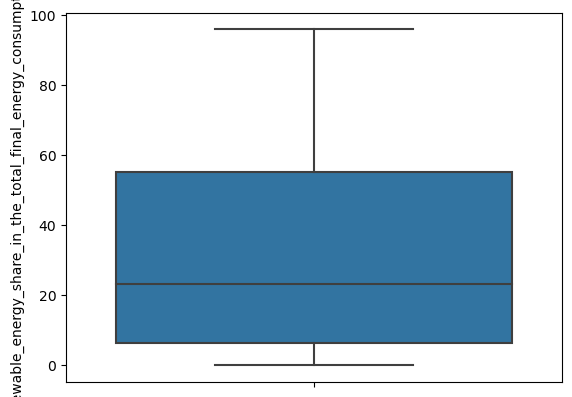

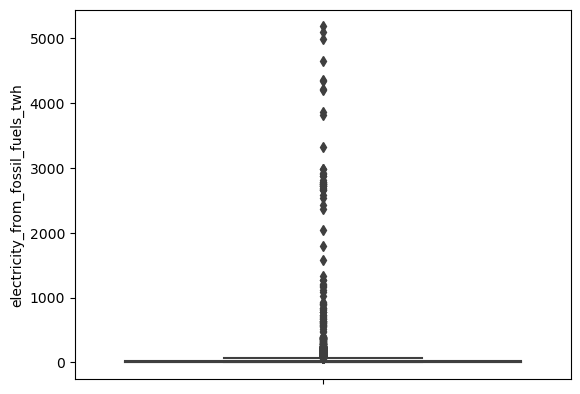

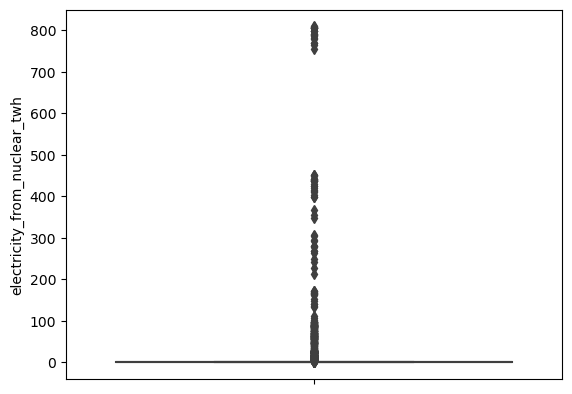

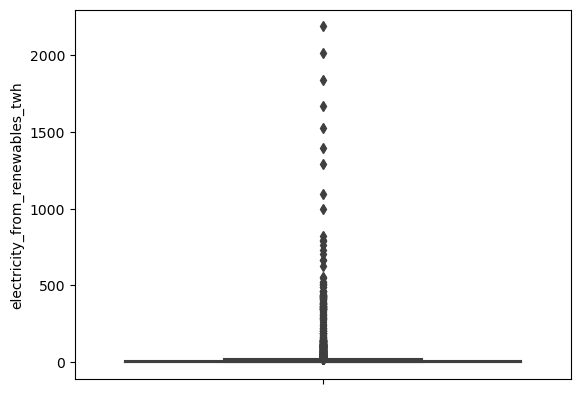

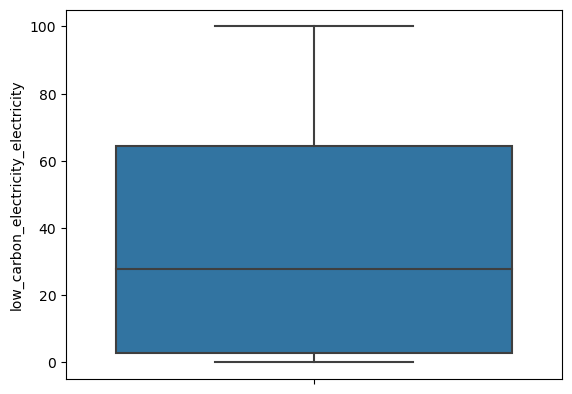

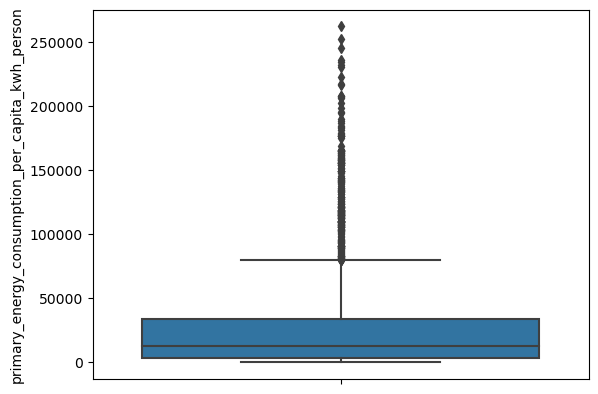

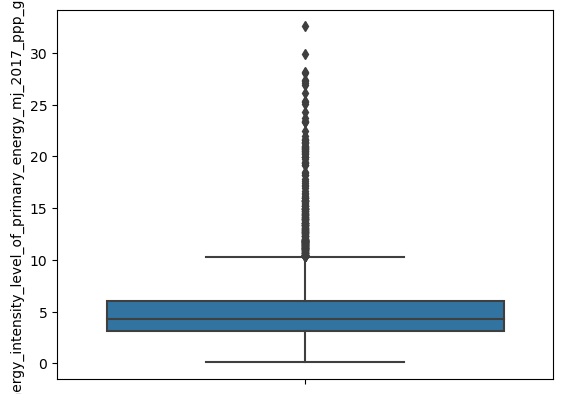

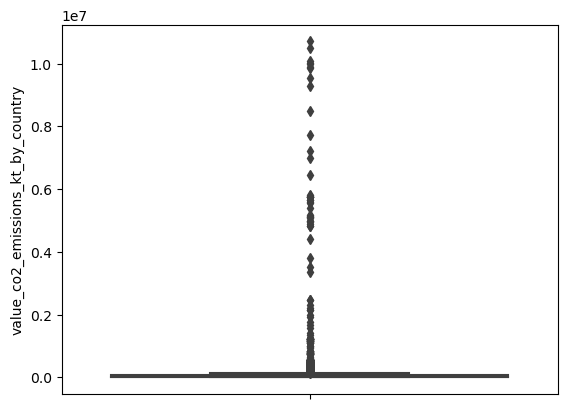

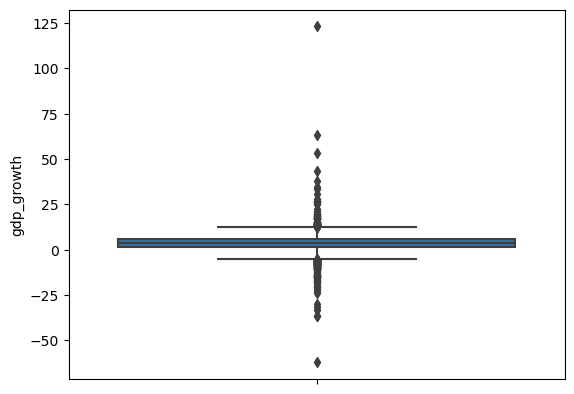

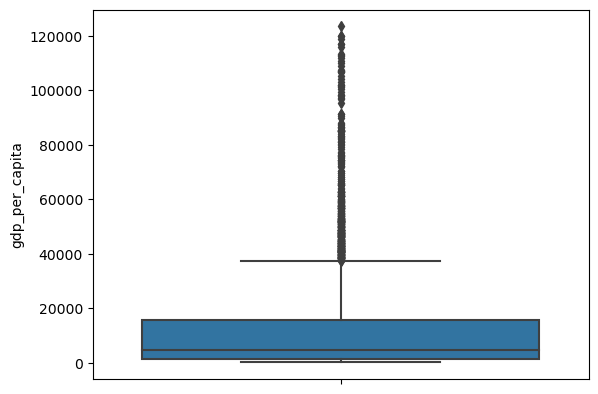

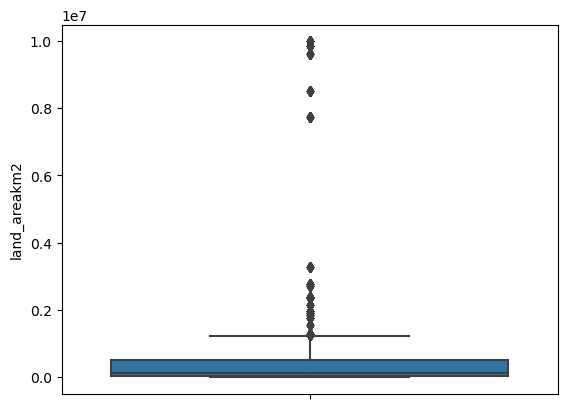

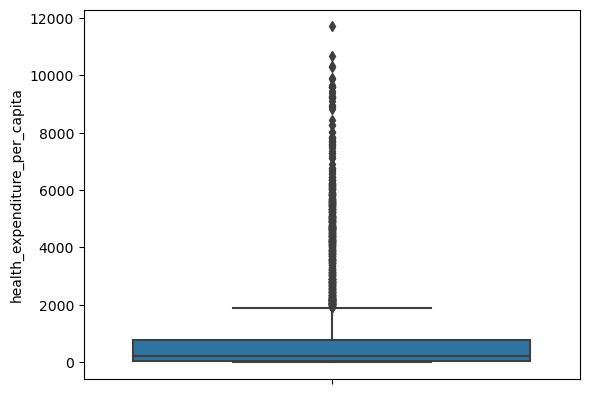

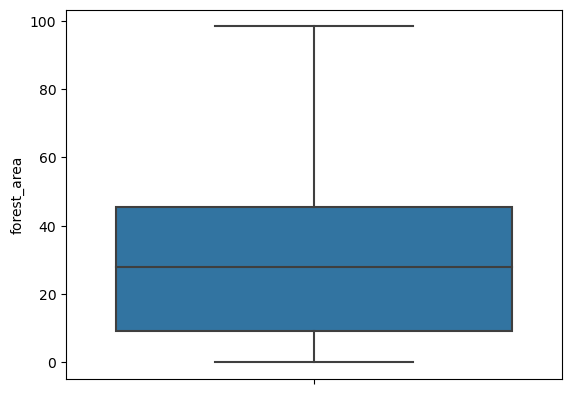

In [29]:
plot_graph(numerical,'boxplot')

#### Fillup NaN Values in different columns


In [30]:
numerical['access_to_electricity_of_population'] = numerical['access_to_electricity_of_population'].fillna(round(numerical['access_to_electricity_of_population'].mean(),2))
numerical['access_to_clean_fuels_for_cooking'] = numerical['access_to_clean_fuels_for_cooking'].fillna(round(numerical['access_to_clean_fuels_for_cooking'].mean(),2))
numerical['renewable_electricity_generating_capacity_per_capita'] = numerical['renewable_electricity_generating_capacity_per_capita'].fillna(round(numerical['renewable_electricity_generating_capacity_per_capita'].mean(),2))
numerical['renewable_energy_share_in_the_total_final_energy_consumption'] = numerical['renewable_energy_share_in_the_total_final_energy_consumption'].fillna(round(numerical['renewable_energy_share_in_the_total_final_energy_consumption'].mean(),2))
numerical['electricity_from_fossil_fuels_twh'] = numerical['electricity_from_fossil_fuels_twh'].fillna(round(numerical['electricity_from_fossil_fuels_twh'].median(),2))
numerical['electricity_from_renewables_twh'] = numerical['electricity_from_renewables_twh'].fillna(round(numerical['electricity_from_renewables_twh'].median(),2))
numerical['electricity_from_nuclear_twh'] = numerical['electricity_from_nuclear_twh'].fillna(round(numerical['electricity_from_nuclear_twh'].mean(),2))
numerical['low_carbon_electricity_electricity'] = numerical['low_carbon_electricity_electricity'].fillna(round(numerical['low_carbon_electricity_electricity'].mean(),2))
numerical['energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp'] = numerical['energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp'].fillna(round(numerical['energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp'].mean(),2))
numerical['value_co2_emissions_kt_by_country'] = numerical['value_co2_emissions_kt_by_country'].fillna(round(numerical['value_co2_emissions_kt_by_country'].quantile([.1, .25, .5, .75, .95]).values[3],2))
numerical['gdp_growth'] = numerical['gdp_growth'].fillna(round(numerical['gdp_growth'].mean(),2))
numerical['gdp_per_capita'] = numerical['gdp_per_capita'].fillna(round(numerical['gdp_per_capita'].median(),2))
numerical['health_expenditure_per_capita'] = numerical['health_expenditure_per_capita'].fillna(round(numerical['health_expenditure_per_capita'].mean(),2))
numerical['land_areakm2'] = numerical['land_areakm2'].fillna(round(numerical['land_areakm2'].mean(),2))

In [31]:
numerical.isnull().sum()

year                                                            0
access_to_electricity_of_population                             0
access_to_clean_fuels_for_cooking                               0
renewable_electricity_generating_capacity_per_capita            0
renewable_energy_share_in_the_total_final_energy_consumption    0
electricity_from_fossil_fuels_twh                               0
electricity_from_nuclear_twh                                    0
electricity_from_renewables_twh                                 0
low_carbon_electricity_electricity                              0
primary_energy_consumption_per_capita_kwh_person                0
energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp        0
value_co2_emissions_kt_by_country                               0
gdp_growth                                                      0
gdp_per_capita                                                  0
land_areakm2                                                    0
health_exp

#### Save cleaned data in csv format

#### percentage of forest area converted to square kilometer of country

In [32]:
forest_area_s2km = pd.DataFrame(round((numerical['forest_area']/100) * (numerical['land_areakm2']),2)).reset_index()
forest_area_s2km.columns = ['row_no','forest_area_s2km']
numerical = pd.concat([numerical,forest_area_s2km['forest_area_s2km']], axis=1)

In [33]:
numerical

,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,low_carbon_electricity_electricity,primary_energy_consumption_per_capita_kwh_person,energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp,value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,land_areakm2,health_expenditure_per_capita,forest_area,forest_area_s2km
0,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.440000,4578.630000,652230.0,886.73,1.85,12066.26
1,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.440000,4578.630000,652230.0,886.73,1.85,12066.26
2,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.440000,179.426579,652230.0,17.01,1.85,12066.26
3,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,652230.0,17.81,1.85,12066.26
4,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,652230.0,21.43,1.85,12066.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,2016,42.561730,29.8,62.88,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,390757.0,106.19,45.57,178067.96
3645,2017,44.178635,29.8,62.33,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,390757.0,92.25,45.45,177599.06
3646,2018,45.572647,29.9,82.53,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,390757.0,114.63,45.33,177130.15
3647,2019,46.781475,30.1,81.40,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,390757.0,54.81,45.21,176661.24


In [34]:
categorical.to_csv('categorical.csv',index=False)
numerical.to_csv('numerical.csv',index=False)
data_cln = pd.concat([categorical,numerical], axis=1)
data_cln.to_csv('final_clean_data.csv',index=False)

In [86]:
data_cln = pd.read_csv('final_clean_data.csv')

## Visual Report

#### Function to plot features on world map

In [100]:
def plot_world_map(column_name, title):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = data_cln[data_cln['year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title='Index'),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{title} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly_white',  # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

### 1. Access to Electricity of Population(%) (By Country with Map Slider)

In [101]:
column_name = 'access_to_electricity_of_population'
title = 'Access to Electricity of Population(%)'
plot_world_map(column_name, title)

[Click here to watch the video](https://www.youtube.com/watch?v=OFIidYj6Cec)


In [111]:
# %%HTML
# <iframe width="560" height="315" src="https://www.youtube.com/embed/OFIidYj6Cec?si=HzRjEdZXKBn7K4BK" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

### 2. Renewable Energy  percentage(%) of total final energy consumption (By Country with Map Slider)

In [89]:
column_name = 'renewable_energy_share_in_the_total_final_energy_consumption'
title = 'Renewable Energy  percentage(%) of total final energy consumption'
plot_world_map(column_name, title)

In [110]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/g6lkGF0KfBI?si=ydJKOT2Nq1xLR5_I" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

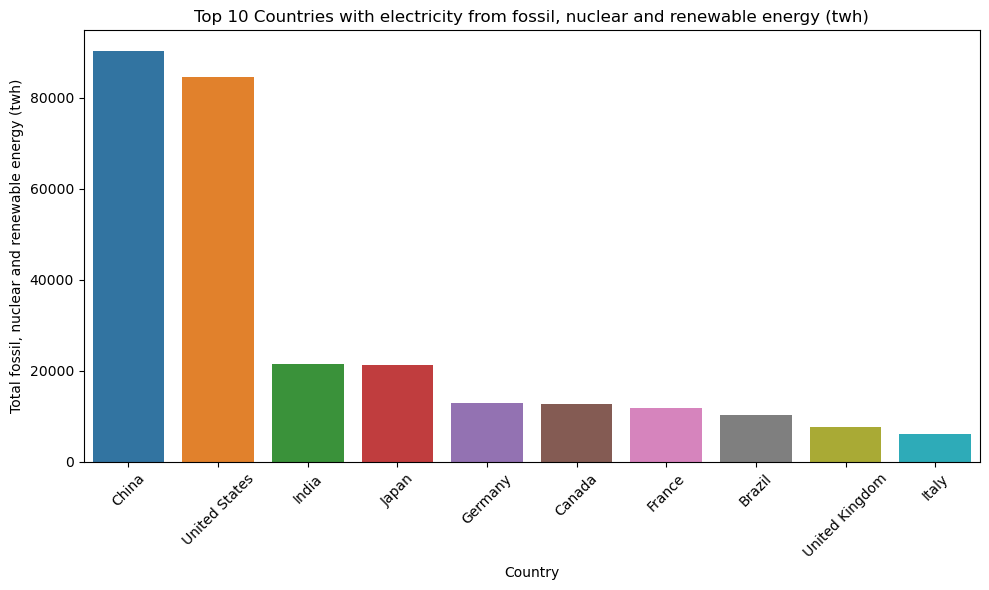

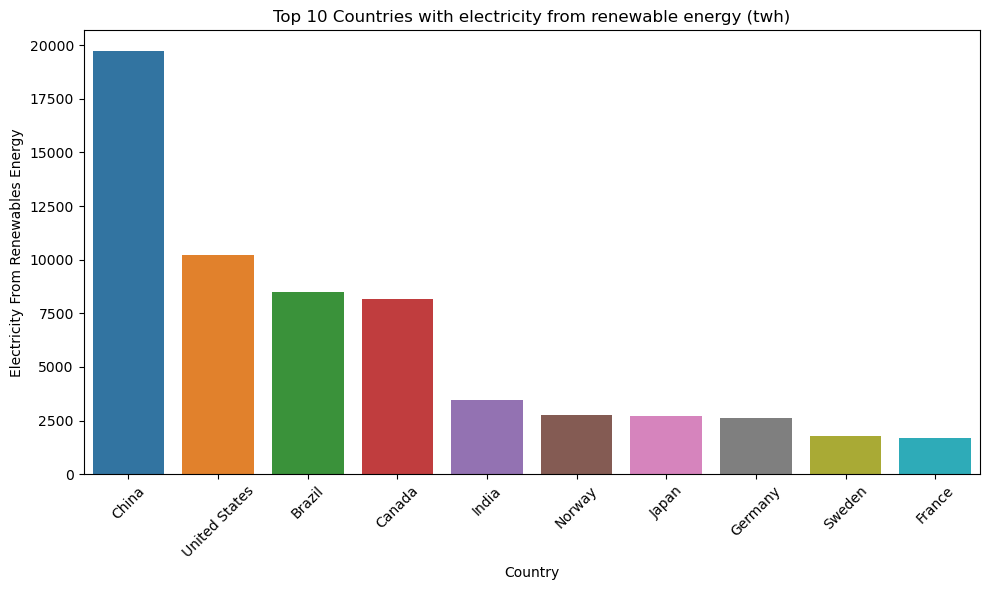

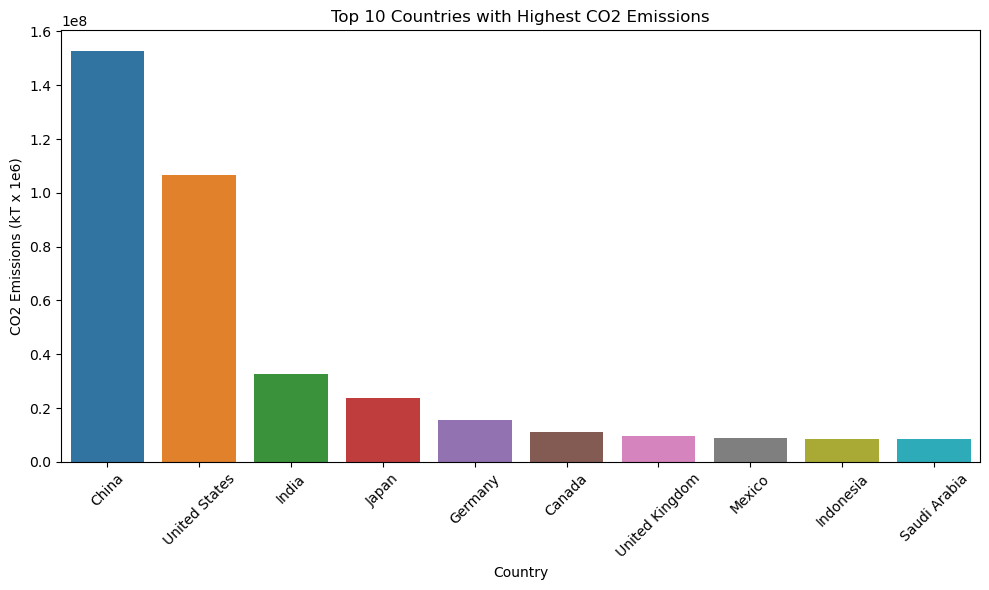

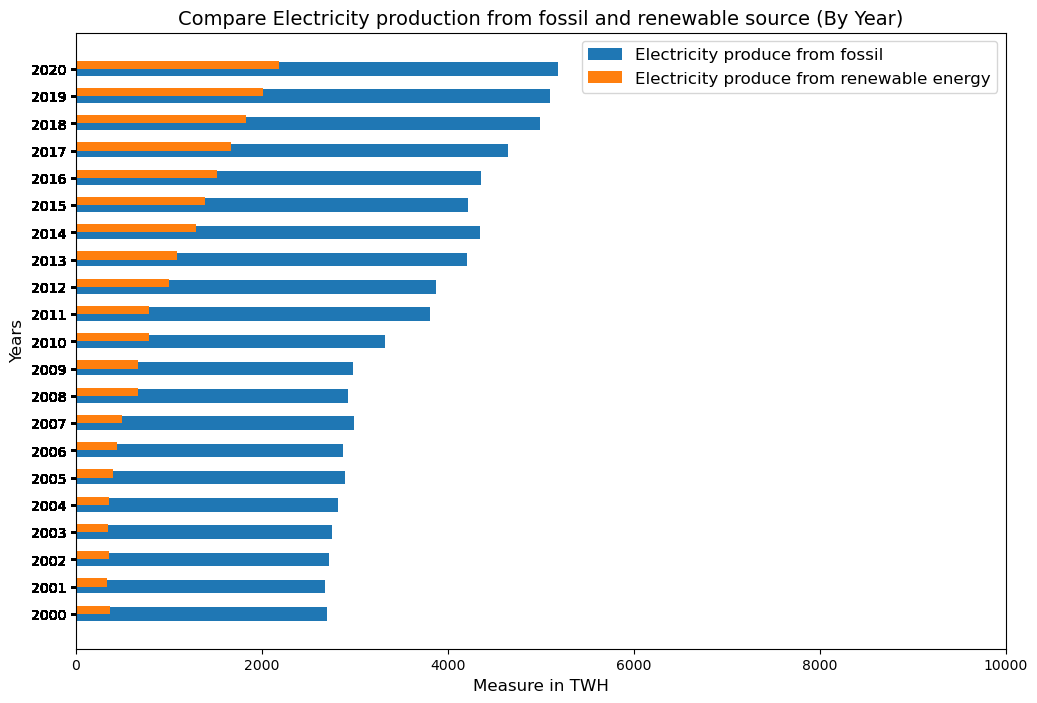

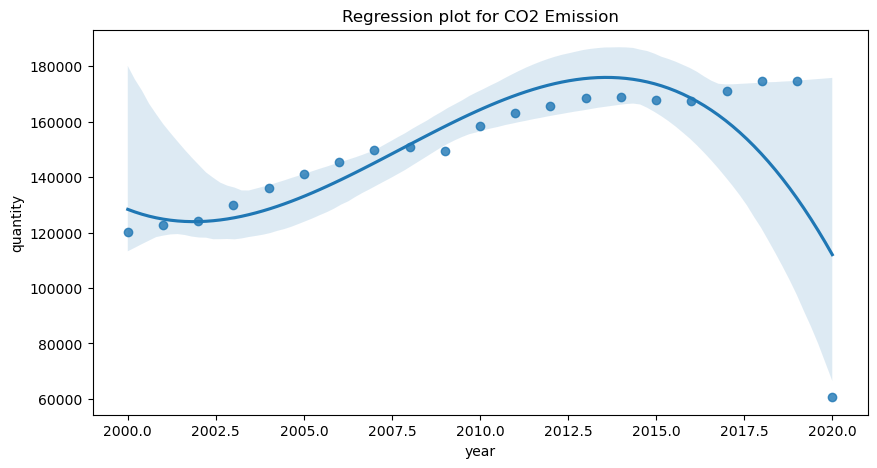

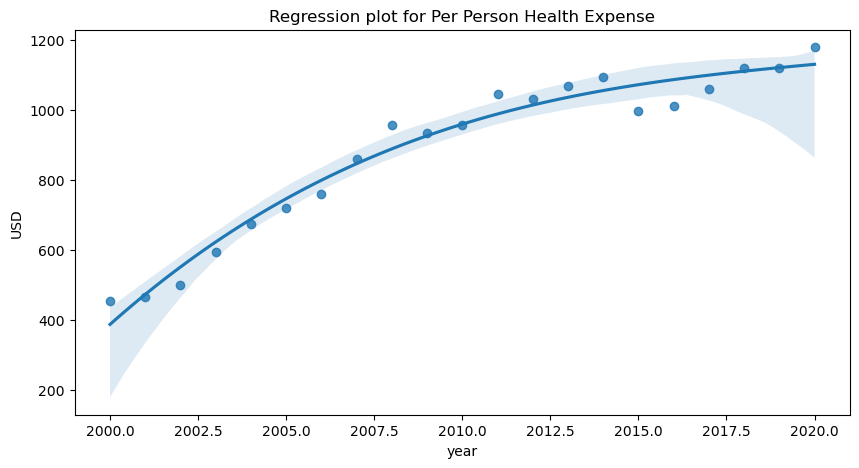

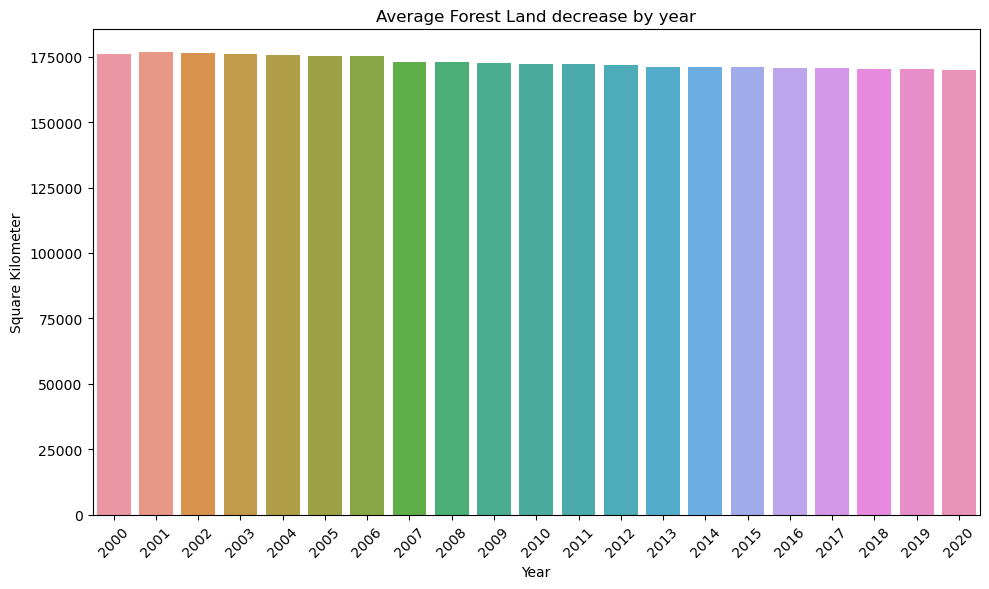

In [90]:
%run visual-report.ipynb

## Model Preparation

In [37]:
target = 'primary_energy_consumption_per_capita_kwh_person'

features = [
    'access_to_electricity_of_population',
    'renewable_electricity_generating_capacity_per_capita',
    'gdp_per_capita',
    'electricity_from_fossil_fuels_twh']

In [38]:
# define test size of data 
input_test_size = 0.3 

In [39]:
%run model.ipynb

In [40]:
results

,Model,MSE,R-squared
0,Random Forest,1.356079e+08,0.885764
1,Linear Regression,6.648285e+08,0.439947
2,Gradient Boosting,1.507575e+08,0.873002


In [41]:
target = 'value_co2_emissions_kt_by_country'

features = [
    'electricity_from_fossil_fuels_twh',
    'electricity_from_nuclear_twh',
    'electricity_from_renewables_twh',
    'land_areakm2']

In [42]:
# define test size of data 
input_test_size = 0.2 

In [43]:
%run model.ipynb

In [44]:
results

,Model,MSE,R-squared
0,Random Forest,1.416950e+09,0.995015
1,Linear Regression,1.523408e+10,0.946401
2,Gradient Boosting,3.832801e+09,0.986515


## Summary and conclusions

After concluded the project I am very much excited to share rich insights and exploration of data on global sustainable energy.
In addition, happy to share that I included few more data got through API of World Bank. It makes the original data richer and 
provides different dimensions to think.


From the beginning of the project handle the data very carefully. Follow all the processes cleaning, wrangling, EDA, visual report,processing data, model train, test and prediction test score.

The significant findings are: 

    1. Electricity access to population in every country are increases year by year
    
    2. Countries are successful to supply more renewable energy to their national grid. Hence, Percentage of energy supply   
       increases year by year all over the world but at the begining Middle african countries are pioneer 
       
    3. The developed or wester world produces largest amount of electricity from all sources
    
    4. The more developed countries emit more CO2 in the environment though they produce significant electricity 
       from natural resources. ex: China, USA etc.
    
    5. Per person health expenses are gradually increases while CO2 emissions also gradually increases except in the
       year 2020 
    
    6. Global energy has an impact on forest. Its decreases from 2000 to 2020
    
    7. Few features in the data are closely correlated to each other. Findings those through the correlation matrix
    
    8. Used three Machine Learning algorithms for two sets of targets and features to find out a appropriate model.    
       For both cases Random Forest algorithm performs very well for targets       
       'primary_energy_consumption_per_capita_kwh_person' and 'value_co2_emissions_kt_by_country' value of 0.885764 and 
       0.995015  respectively.

        
In essence I can say that any stack holder uses this model to find out predictive result of one or both of the two targets
to make a business decision. In addition s/he considers the visual reports which are enclosed in this notebook. I included 
an interface developed by streamlit python package to predict 'value_co2_emissions_kt_by_country' by giving input in the 
input field. To run this app in local machine please follow the following steps:
 
       1. Go to the folder 'app'
       2. run command 'streamlit run your_app.py'
       3. you see the home page with the address 'http://localhost:8501/'
       4. Select 'Prediction' menu item from left menu bar
       5. Now you will see a form. Input values
       6. Press button 'Get Your Prediction' to get the prediction of CO2 emissions for a year